<a href="https://colab.research.google.com/github/kushal-iliger/ProjectCompleted/blob/main/RedWineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

In [10]:
wineDataset = pd.read_csv('winequality-red.csv')

In [11]:
wineDataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
wineDataset.shape

(1599, 12)

In [17]:
wineDataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
wineDataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


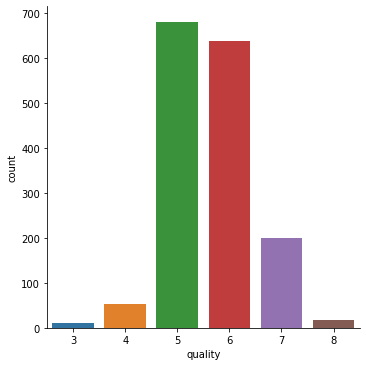

In [19]:
sns.catplot(x='quality', data = wineDataset, kind = 'count')

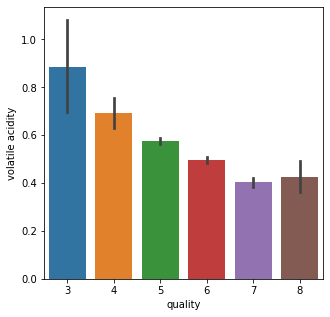

In [20]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wineDataset)

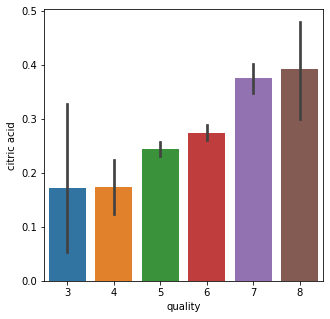

In [21]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wineDataset)

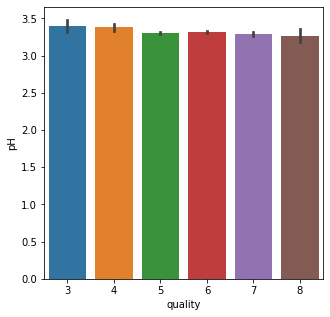

In [22]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'pH', data = wineDataset)

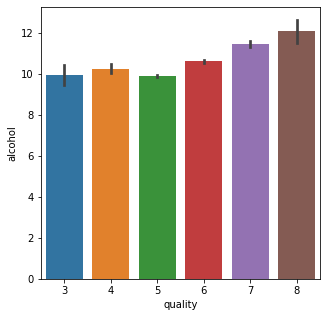

In [23]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = wineDataset)

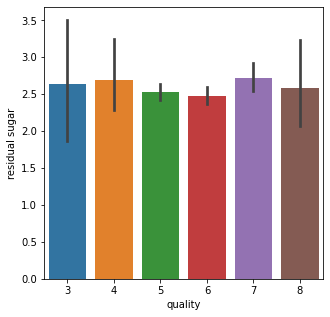

In [24]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data = wineDataset)

In [25]:
corr= wineDataset.corr()

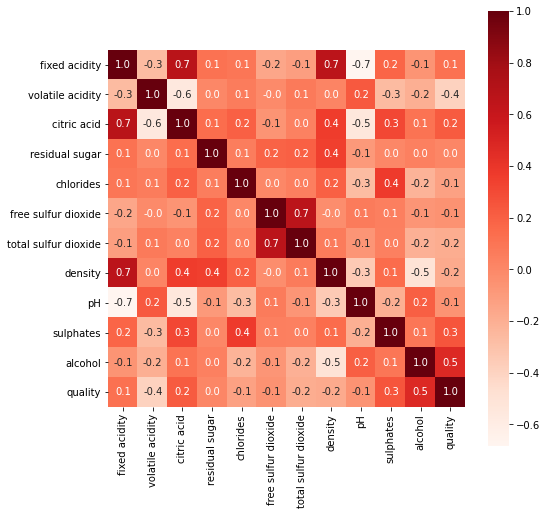

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square=True, fmt = '.1f', annot = True, cmap = 'Reds')

In [32]:
wineDataset_x = wineDataset.drop('quality',axis=1)

In [33]:
wineDataset_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [34]:
wineDataset_y = wineDataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(wineDataset_y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [36]:
wineDataset_x_train,wineDataset_x_test, wineDataset_y_train, wineDataset_y_test = train_test_split(wineDataset_x,wineDataset_y, test_size=0.3,random_state=3)

In [37]:
print(wineDataset_y.shape,wineDataset_y_train.shape, wineDataset_y_test.shape)

(1599,) (1119,) (480,)


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier()

In [40]:
model.fit(wineDataset_x_train, wineDataset_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
from sklearn.metrics import accuracy_score
wineDataset_test_prediction = model.predict(wineDataset_x_test)
test_data_accuracy = accuracy_score(wineDataset_test_prediction, wineDataset_y_test)

In [42]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9229166666666667


In [43]:
wineDataset_x_train,wineDataset_x_test, wineDataset_y_train, wineDataset_y_test = train_test_split(wineDataset_x,wineDataset_y, test_size=0.2,random_state=3)

In [44]:
model.fit(wineDataset_x_train, wineDataset_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
from sklearn.metrics import accuracy_score
wineDataset_test_prediction = model.predict(wineDataset_x_test)
test_data_accuracy = accuracy_score(wineDataset_test_prediction, wineDataset_y_test)

In [46]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9375


In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(wineDataset_test_prediction, wineDataset_y_test)

array([[276,  13],
       [  7,  24]])

In [49]:
def plot_loss():
    plt.figure(figsize=(10,5), dpi=80)

    history_df = pd.DataFrame(history.history)

    plt.plot(np.arange(0,history_df.shape[0]), history_df['loss'])
    plt.plot(np.arange(0,history_df.shape[0]), history_df['val_loss'])
    plt.show()
    print("\nMinimum validation loss: {}".format(history_df['val_loss'].min()))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
100/100 [==============================] - 1s 5ms/step - loss: 0.7025 - accuracy: 0.3194 - val_loss: 0.6996 - val_accuracy: 0.1075

Epoch 00001: val_loss improved from inf to 0.69964, saving model to ./model_tensorflow.h5
Epoch 2/500
100/100 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.4287 - val_loss: 0.6948 - val_accuracy: 0.3600

Epoch 00002: val_loss improved from 0.69964 to 0.69480, saving model to ./model_tensorflow.h5
Epoch 3/500
100/100 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.4646 - val_loss: 0.6900 - val_accuracy: 0.7550

Epoch 00003: val_loss improved from 0.69480 to 0.69002, saving model to ./model_tensorflow.h5
Epoch 4/500
100/100 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5855 - val_loss: 0.6854 - val_accuracy: 0.8850

Epoch 00004: val_loss improved from 0.69002 to 0.68536, saving model to ./model_tensorflow.h5
Epoch 5/500
100/100 [==============================]

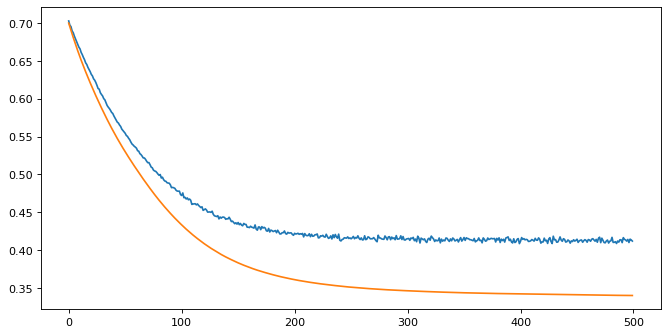


Minimum validation loss: 0.3402025103569031


In [56]:
df = pd.read_csv("winequality-red.csv")
new_df = df
new_df['quality'] = np.where(new_df['quality']>=7, 1, 0)


X = new_df.drop(['quality'], axis=1)
X = normalize(X)

y = new_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, input_shape=[11], activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='BinaryCrossentropy',
             optimizer=tf.keras.optimizers.SGD(lr=0.0001),
             metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="./model_tensorflow.h5", verbose=1, save_best_only=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    steps_per_epoch=100,
                    epochs=500,
                    callbacks=[checkpointer])


model = "./model_tensorflow.h5"
model = tf.keras.models.load_model(model, compile = True)
prediction_train = np.round(model.predict(X_train))
prediction_val = np.round(model.predict(X_test))

print('\nTrain Accuracy : {}' .format(metrics.accuracy_score(prediction_train, y_train)))
print('Validation Accuracy : {}' .format(metrics.accuracy_score(prediction_val, y_test)))

plot_loss()